# Introduction


A census is the procedure of systematically acquiring and recording information about the members of a given population. The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc. 

This data was extracted from the 1994 Census bureau database.


# Objective of this project

The goal of this project is to determine what facors contribute to a person making over 50K a year or not given their demographic variation.

# Import Packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

### Import Data


In [2]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

Replace '?' with the most frequent value in every column 

In [7]:
attrib, counts = np.unique(df['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['workclass'][df['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['occupation'][df['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['native-country'][df['native-country'] == '?'] = most_freq_attrib 

C:\Users\public\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\public\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\public\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # 

In [8]:
# Make income variable binary
#df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K': 0, '>50K': 1})
#df.head()

# EDA 

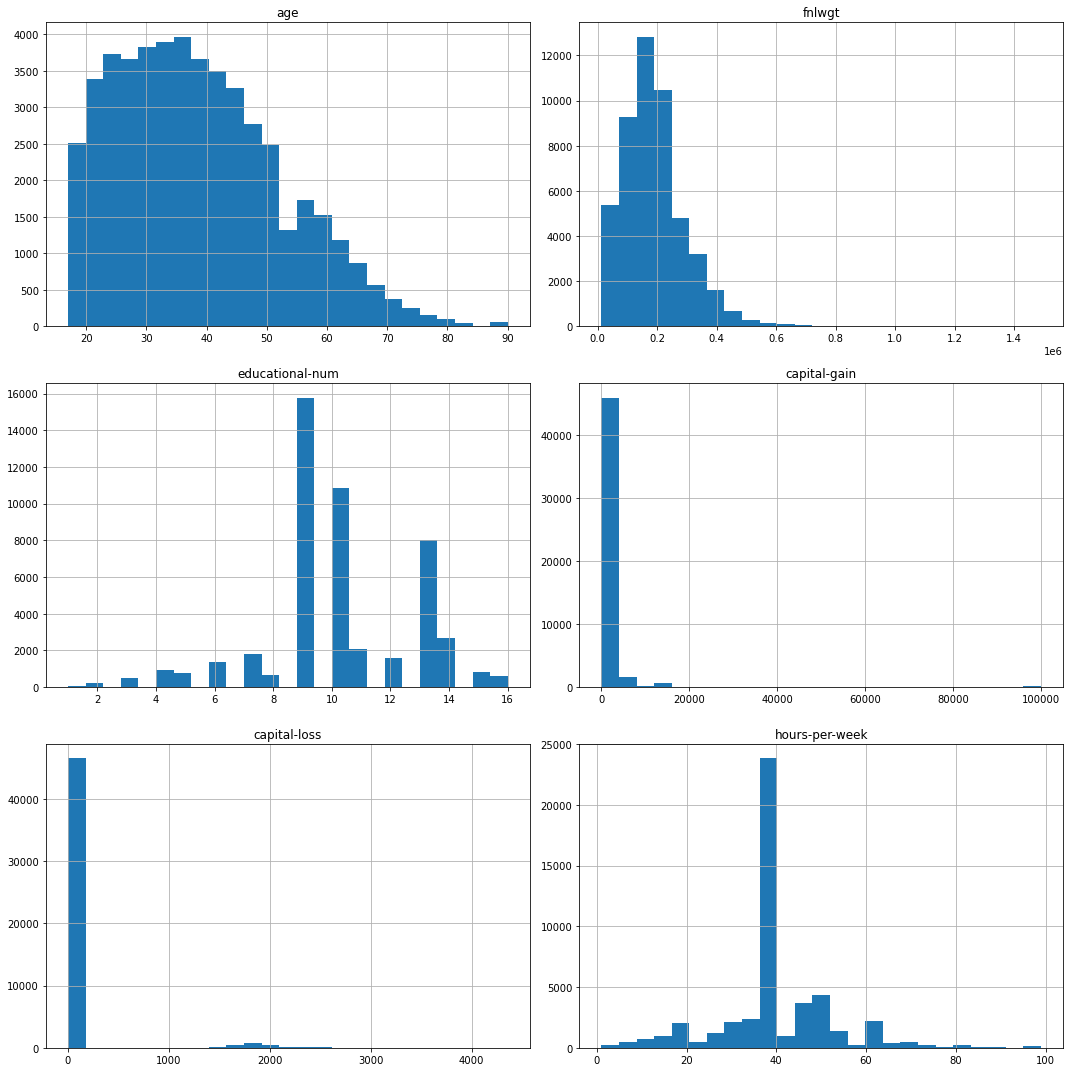

In [9]:
# Plot the histograms for all numeric features.
df.hist(bins=25,figsize=(15,15),color='tab:blue')
plt.tight_layout()
plt.show()

### Description of select distributions
* Age
    * "age" attribute is not symmetric.
    * Minimum and Maximum age of the people is 17 and 90 respectively.
* Hours per week 
    * In this data the hours per week atrribute varies within the range of 1 to 99.
    * Most people work 30-40 hours per week, they are roughly 27,000   people.
    * There are also few people who works 80-100 hours per week and some less than 20 which is unusual.

    * 75 percentage of the people spend 45 or less working hours per week.


### Workclass


In [10]:
sns.set()

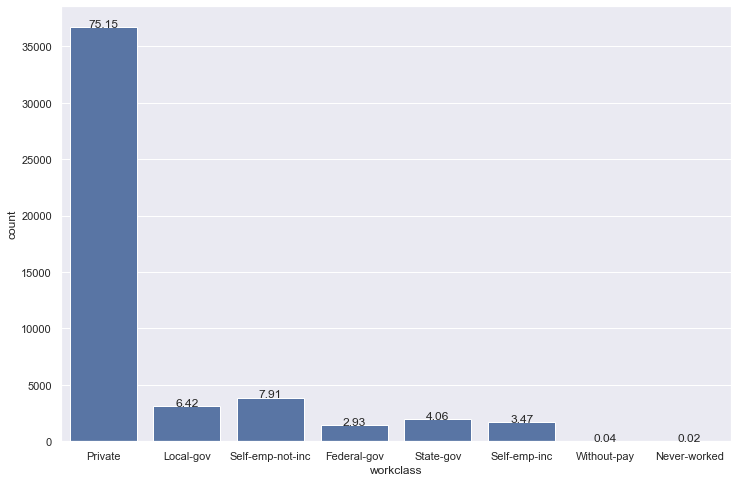

In [11]:
plt.figure(figsize=(12,8))
total = float(len(df["income"]) )

ax = sns.countplot(x="workclass", data=df,color='b')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Summary distribution shows that:

* There are 8 unique categories present in the worclass attribute.
* Most of them belong to the private workclass(36705) i.e. 75.15%.
* without-pay and never-worked has minimum count in workclass attribute(less than 1%).
* There is huge imbalance in the categories of workclass attribute.

### Education

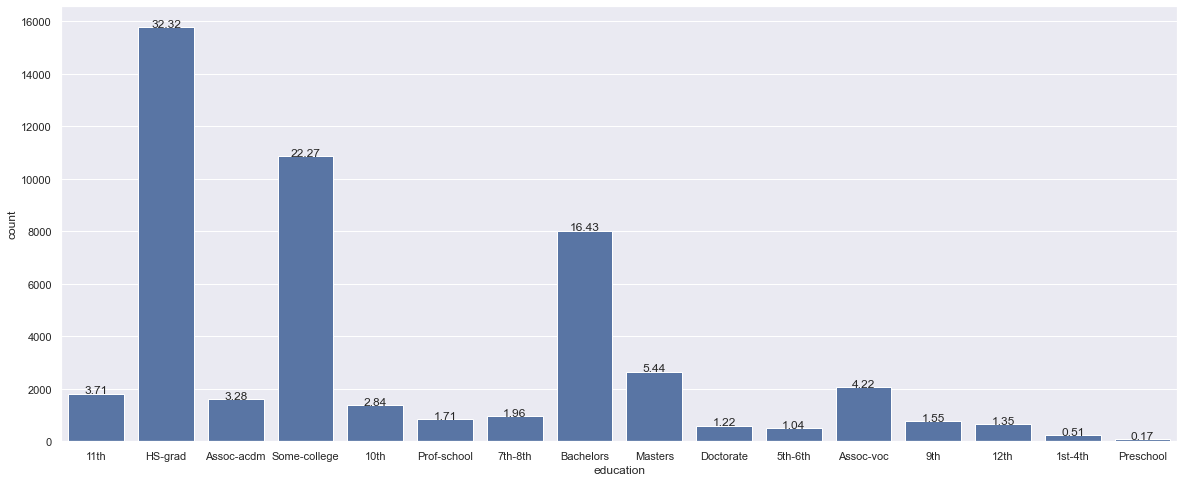

In [12]:
plt.figure(figsize=(20,8))
total = float(len(df["income"]) )

ax = sns.countplot(x="education", data=df,color='b')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

* There are 16 unique categories present in the education attribute.
* Hs-grad has 32.32% of all the education attribute.
* HS-grad (15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025).
* Pre-school has minimum samples i.e. 83.

### Race

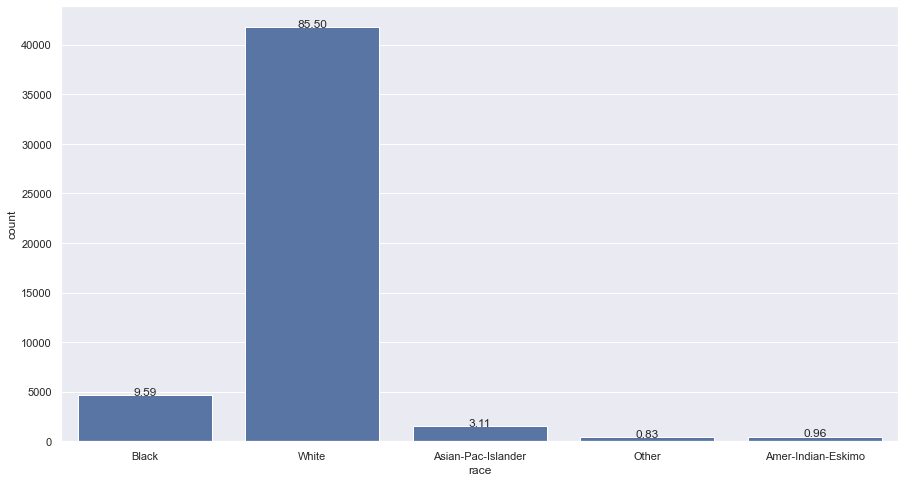

In [13]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="race", data=df,color='b')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

* There are 5 unique categories in the race attribute.
* Most of them are "white" which is roughly 85.50%.
* This dataset is totally bias toward the "white" race.
* Second major race in the dataset is the "black" with just 9.59%.

### Gender

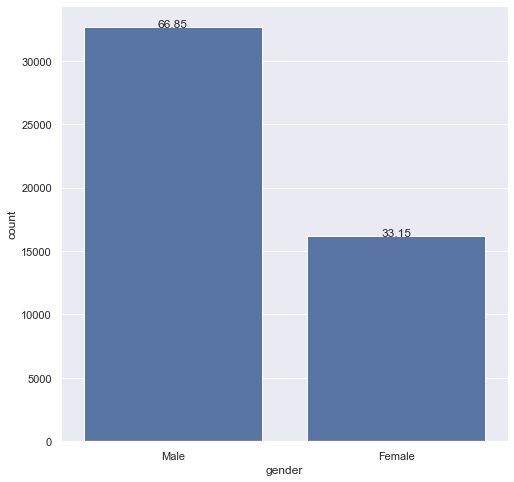

In [14]:
plt.figure(figsize=(8,8))
total = float(len(df) )

ax = sns.countplot(x="gender", data=df,color='b')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

* Distribution shows that this dataset is skewed toward the male with nearly 67%.

### Income

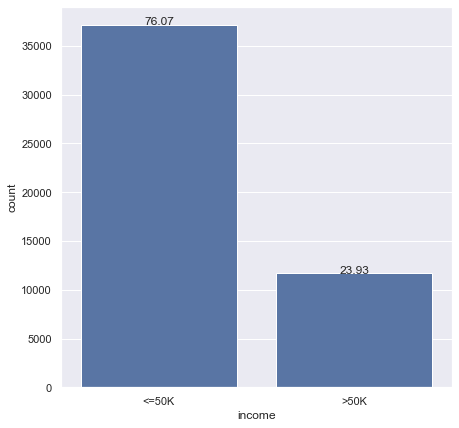

In [15]:
plt.figure(figsize=(7,7))
total = float(len(df) )

ax = sns.countplot(x="income", data=df,color='b')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

* This dataset not balance , i.e. 23.93% of them belong to income group 1 (who earns more than 50k) and 76% fall under the income group 0 (who earns less than 50k).

## Relationship to Income

### Race

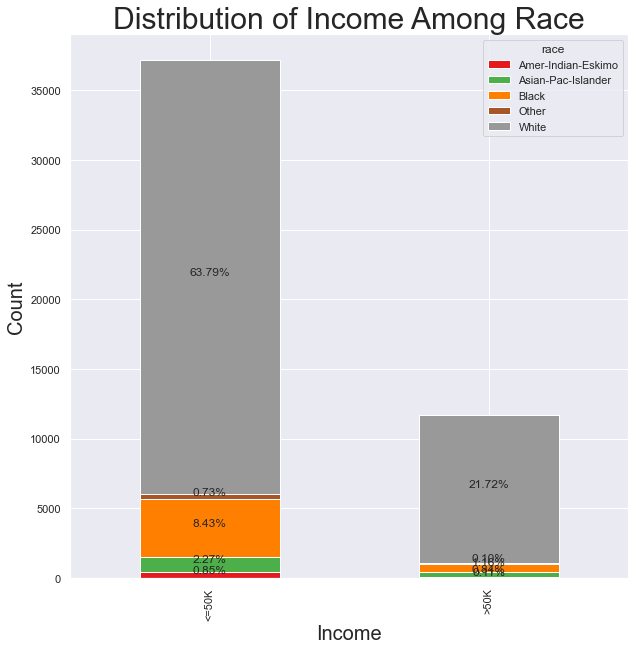

In [21]:
ax_1 = df.groupby(['income','race']).size().unstack('race').plot.bar(stacked=True,colormap='Set1',figsize=(10,10))
plt.xlabel('Income', size=20);
plt.ylabel('Count', size=20)
plt.xticks(rotation=90)
plt.title('Distribution of Income Among Race', size=30)
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              '{:1.2f}%'.format((height/total)*100),
              ha='center', 
              va='bottom')
plt.show()

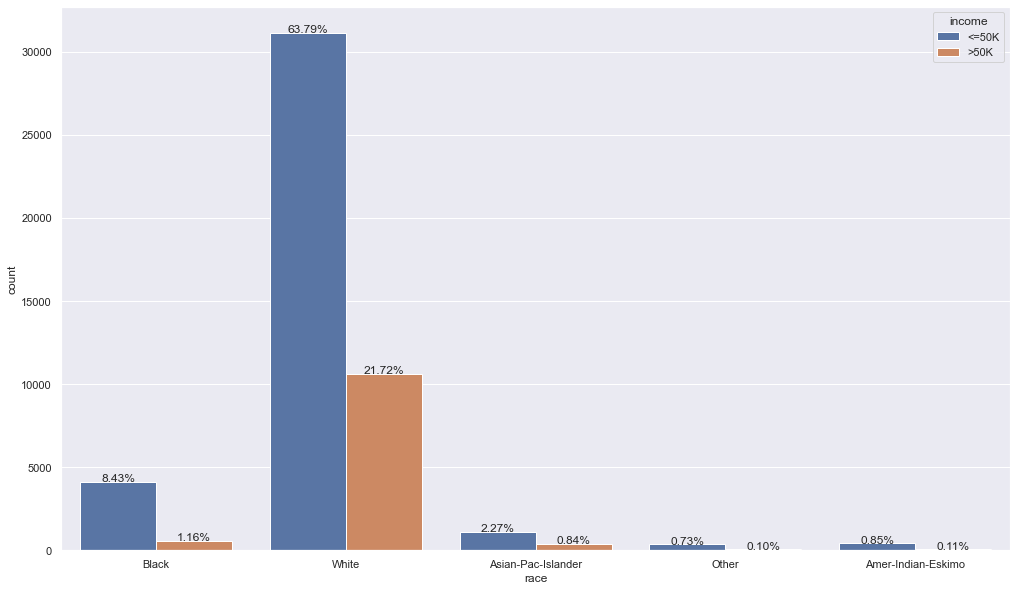

In [22]:
plt.figure(figsize=(17,10))
total = float(len(df) )

ax = sns.countplot(x="race", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
plt.show()


* We can see that the race 'White' dominates the dataset in general
* Far more people in each race make less then 50k a year than make more than 50k a year.

#### Does race have a significant effect on income?
* H0(Null Hypothesis) : There is no relationship between race and income.
* H1(Alternate Hypothesis) : There is a relationship between race and income.

A chi-square goodness of fit test allows us to test whether the observed proportions for a categorical variable differ from hypothesized proportions. The chi-square statistical test is used to determine whether there’s a significant difference between an expected distribution and an actual distribution.

In [61]:
#Create contingency table
c_t = pd.crosstab(df['race'],df['income'],margins = False) 
c_t

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,415,55
Asian-Pac-Islander,1110,409
Black,4119,566
Other,356,50
White,31155,10607


In [62]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
p_value 4.284377710223499e-104
[[  357.53757012   112.46242988]
 [ 1155.53099791   363.46900209]
 [ 3563.96492773  1121.03507227]
 [  308.85160313    97.14839687]
 [31769.11490111  9992.88509889]]
probability=0.950, critical=9.488, stat=487.026
Dependent (reject H0)


* As we have rejected the H0, there is a relationship between these two variables.
* We can conclude that is there is a dependency of "race" attribute on the  variable "income"

### Gender

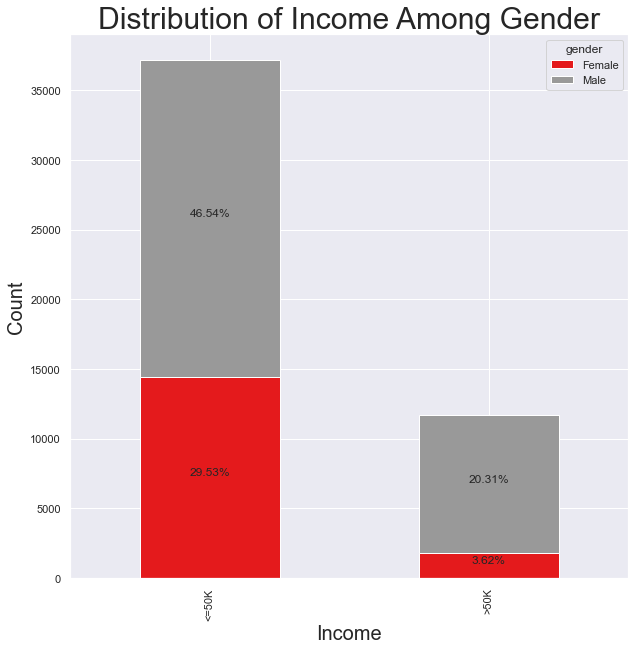

In [23]:
ax_1 = df.groupby(['income','gender']).size().unstack('gender').plot.bar(stacked=True,colormap='Set1',figsize=(10,10))
plt.xlabel('Income', size=20);
plt.ylabel('Count', size=20)
plt.xticks(rotation=90)
plt.title('Distribution of Income Among Gender', size=30)
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              '{:1.2f}%'.format((height/total)*100),
              ha='center', 
              va='bottom')
plt.show()

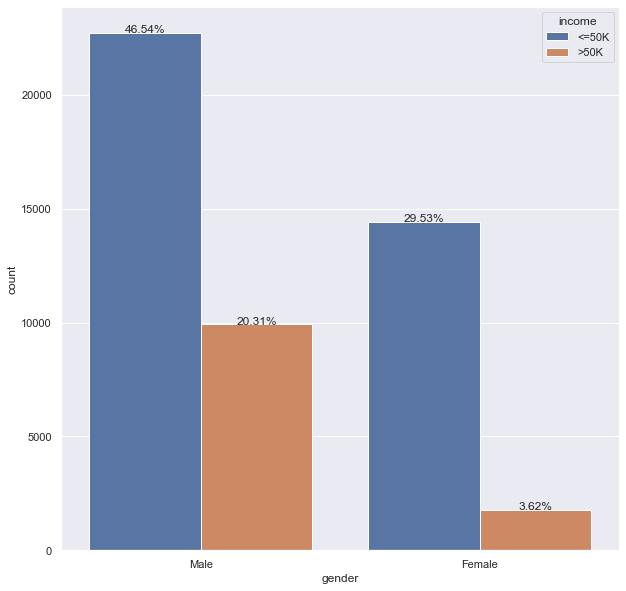

In [24]:
plt.figure(figsize=(10,10))
total = float(len(df) )

ax = sns.countplot(x="gender", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
plt.show()

* For "female" earning more than 50k is rare with only 3.62% of all observations.
* But for male, 20.31% of all people earn more than 50k.

#### Does Gender have an effect on income?

* H0(Null Hypothesis) : There is no relationship between gender and income.
* H1(Alternate Hypothesis) : There is a relationship between gender and income.

In [63]:
# contingency table
c_t = pd.crosstab(df['gender'],df['income'],margins = False) 
c_t

income,<=50K,>50K
gender,,
Female,14423,1769
Male,22732,9918


In [64]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
p_value 0.0
[[12317.54964989  3874.45035011]
 [24837.45035011  7812.54964989]]
probability=0.950, critical=3.841, stat=2248.848
Dependent (reject H0)


* As we have rejected the H0, there is a relationship between these two variables.
* We can conclude that there is a dependency of "gender" attribute on the target variable "income".

### Age

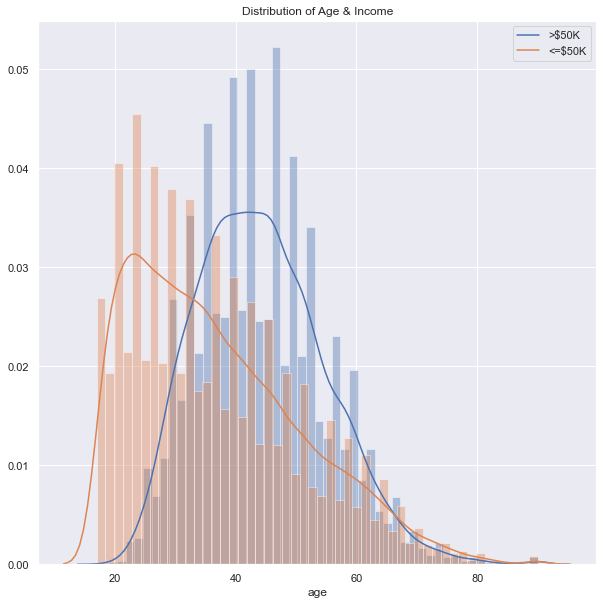

In [66]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['income'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['income'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})
plt.title("Distribution of Age & Income")
plt.savefig("output.png")
plt.show()

* We can see, in general, the older you are the more money you make.
* This makes sense because older people have had more time to accumulate wealth.

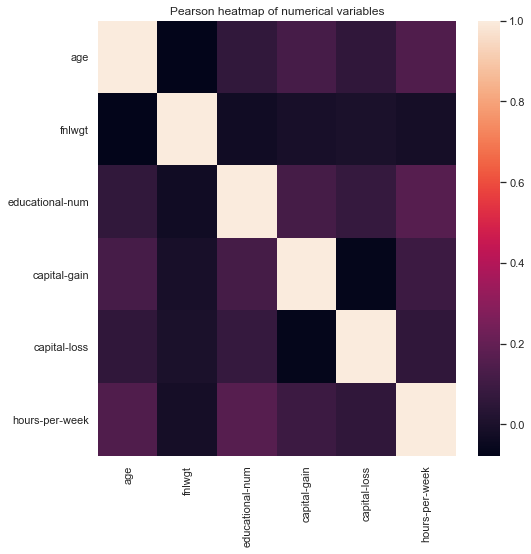

In [68]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(method='spearman'))
plt.title('Pearson heatmap of numerical variables')
plt.savefig('heatmap.png')
plt.show()

* There is no strong correlation among the numeric attributes.
* There is neither strong positive nor strong negative correlation present in any variable .
* The strongest correlation is present between capital gain and hours-per-week with Coefficient .082.(which is less than 0.1, it means that very small correlation among them).

# Conclusions
1. This dataset is not balanced , i.e. 24% of the data belong to income group 1 (who earns more than 50k) and 76% fall under the income group 0 (who earns less than 50k).

2. Older people are more inclined to make >50K a year than younger people

3. For "female" earning more than 50k is rare with only 3.62% of all observations. But for male, 20.31% of all people earn more than 50k.

4. For all races, far more people make less than 50K a year than more.

5. There is no significant correlation among numeric attributes

6. Gender & race have a significant affect on income.